<img src="../logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo semanal 3
#### Lugano Damian

## Consigna

<img src="./pics/plantilla.png" align="center" width="300" /> 

A partir de la plantilla:

Obtener la transferencia para máxima planicidad en la banda de paso utilizando los conceptos de partes de función. Recordar que:  |T(jω)|2=T(jω)⋅T(−jω)=T(s)⋅T(−s)|s=jω
 

Obtener el diagrama de polos y ceros, y un bosquejo de la respuesta en frecuencia.

Implementar el circuito normalizado con estructuras pasivas separadas mediante buffers.

Obtenga el circuito que cumpla con la plantilla requerida si dispone de capacitores de 100nf.

Proponga una red que se comporte igual a la hallada en 4) pero con resistores, capacitores y opamps.

Bonus:

+10 💎 Proponer un planteo alternativo a 1) usando la ωButter (ver Schaumann 6.4)

+10  ⚽️ Simulación numérica y circuital.

+10  🍺 Presentación en jupyter notebook. 

## Resolución

### Puntos 1 2 3 y 4


In [1]:
from IPython.display import IFrame
IFrame("./docs/puntos1234.pdf", width=950, height=1000)

### Punto 5

Para desarrollar el punto 5 fue necesario buscar un filtro activo pasa bajos que se puede diseñar para Q=1 y un $\omega_0 = 1.252 rad/s$ con la restricción de solo poder utilizar capacitores de 100nF.

Por lo que se buscó en una hoja de ecuaciones de diseño, proveniente de TC1 (hoja 2 del siguiente pdf), y se encontró que el filtro activo bicuadrado pasa bajos tiene una función transferencia de facil diseño y que permite establecer las características del filtro diseñado, aún teniendo la restricción de iguales capacitores.

Si bien se podría haber utilizado un Ackerberg-Mossberg, el filtro bicuadrado usa menos opamps y menos componentes.

A continuación la resolución:

In [3]:
from IPython.display import IFrame
IFrame("./docs/punto5.pdf", width=950, height=1000)

## Bonus

Si bien el punto de bonus solo pedía utilizar el método de renormalización usando $\omega_B$ para llegar a la función transferencia. Tambien se lo desnormalizó para comprobar que el circuito final es el mismo:

In [4]:
from IPython.display import IFrame
IFrame("./docs/bonus.pdf", width=950, height=1000)

## Simulación numérica y circuital

### Simulación numérica en python

In [9]:
# se importan librerías y funciones de la cátedra

from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

#Funciones de aproximacion por maxima planicidad
def MP_aprox(ws, alpha_max, alpha_min):

    xi = ( np.sqrt( 10**(alpha_max / 10) - 1 ))    #Por lo general w_p=1    

    order=np.ceil( 0.5 * ( np.log10( ( 10**(alpha_min * 0.1) - 1 ) / xi**2)  / np.log10(ws) ) ) 

    z,p,k = sig.buttap (order)
    N, D = sig.zpk2tf(z, p, k)
    N, D = sig.lp2lp(N, D, xi**(-1/order) ) #Esta función cambia el filtro para otra frecuencia. Es la renormalización del filtro para epsilon distinto de 1
    
    z,p,k=sig.tf2zpk(N,D)
    
    return N, D

(3,
 <Axes: title={'center': 'Group delay'}, xlabel='Angular frequency [rad/sec]', ylabel='Group Delay [sec]'>)

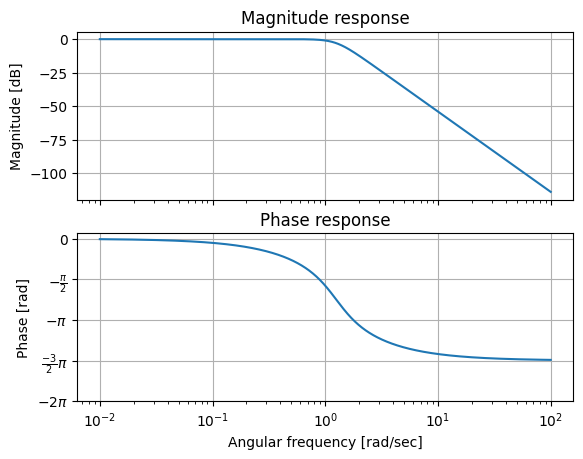

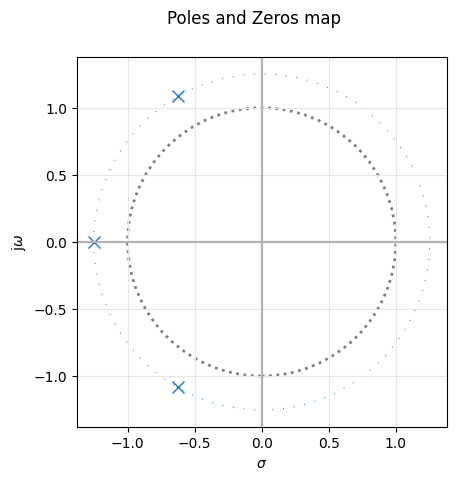

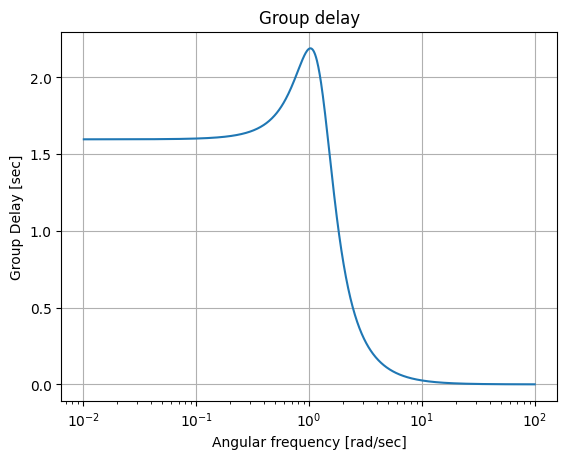

In [10]:
#Simulación de la función transferencia diseñada

#wp=1 // siempre se normalizará a 1
ws=2
alfa_max=1
alfa_min=12

N,D = MP_aprox(ws, alfa_max, alfa_min)
T = TransferFunction(N, D)

bodePlot(T, fig_id=1)
pzmap(T, fig_id=2 )
GroupDelay(T, fig_id=3)

### Simulación circuital en LTspice

#### Filtro pasivo pasabajos normalizado

<img src="./pics/Circ.png" align="center" width="800" /> 

Como el eje x de la simulación en LTspice está en Hz, para pasar de frecuencia a frecuencia angular $ f=\frac{\omega}{2\pi}$ 

Entonces para $\omega=1 \Longrightarrow f=0.159Hz$ y para $\omega=2 \Longrightarrow f=0.318Hz$

<img src="./pics/Graf.png" align="center" width="800" /> 

Como se puede observar, se cumplen la plantilla propuesta ya que para $\omega = 1$ la atenuación es de 1dB y para $\omega=2$ la atenuación es mayor a 12dB.

#### Filtro pasivo pasabajos desnormalizado

<img src="./pics/CircdesN.png" align="center" width="800" /> 
<img src="./pics/GrafdesN.png" align="center" width="800" /> 

Como se puede observar de los gráficos, al desnormalizar en frecuencia e impedancia con capacitores de 100nF, la plantilla propuesta se sigue cumpliendo.

#### Filtro activo pasabajos normalizado

<img src="./pics/CircBic.png" align="center" width="800" /> 
<img src="./pics/GrafBic.png" align="center" width="800" /> 

De los gráficos se puede ver que el filtro activo tiene la misma respuesta en frecuencia que el pasivo, con la ventaja de que no se usaron inductores.

#### Filtro activo pasabajos desnormalizado

<img src="./pics/CircBicdesN.png" align="center" width="800" /> 
<img src="./pics/GrafBicdesN.png" align="center" width="800" /> 

Como se puede observar de los gráficos, al desnormalizar en frecuencia e impedancia con capacitores de 100nF, el circuito mantiene la misma respuesta en frecuencia.

## Conclusiones

Del presente trabajo es importante destacar que ambos métodos utilizados para el diseño de un filtro por aproximación de maxima planicidad son válidos. Sin embargo, personalmente me resulta mas fácil usar la frecuencia $\omega_B$ ya que es más simple de trabajar con las funciones de Butterworth y los componentes normalizados para valores conocidos.

Por otro lado tambíen se puedo superar el desafío de buscar un filtro activo que pueda cumplir las características deseadas usando solo capacitores de 100nF. Al simular ambos filtros, activo y pasivo, se puede observar que su respuesta en frecuencia es la misma.

Queda pendiente el uso de otros filtros activos con funciones transferencias más complejas de cara al diseño como Sallen-Key o MFB.